In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [14]:
df = pd.read_csv("Health_insurance.csv")

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

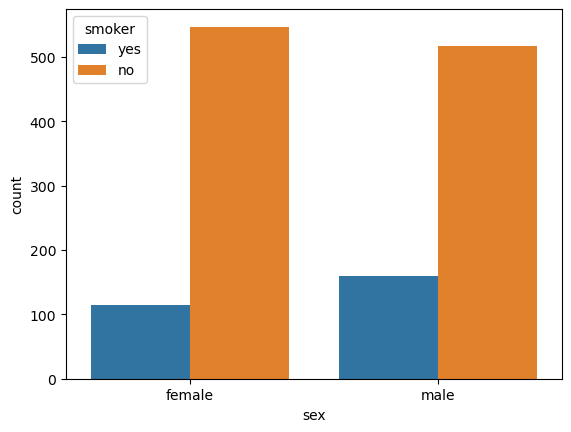

In [17]:
sns.countplot(df, x = 'sex', hue = "smoker")
plt.show()

In [18]:
df["sex"] = df["sex"].map({"female": 0, "male": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})
print(df.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


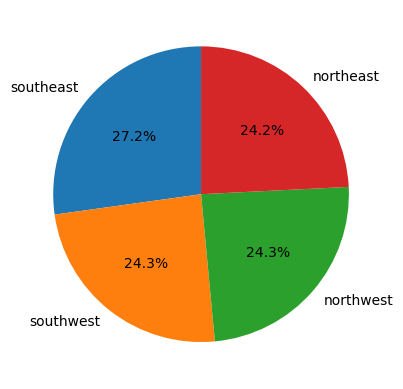

In [23]:
pie = df["region"].value_counts()
regions = pie.index
population = pie.values

plt.pie(population, labels=regions, autopct='%1.1f%%', startangle=90)
plt.show()

C:\Users\moink\AppData\Local\Temp\ipykernel_7548\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

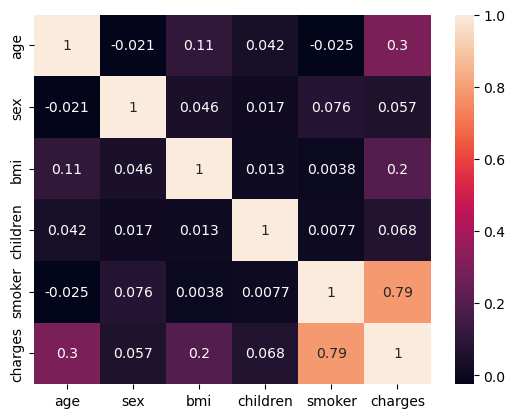

In [25]:
sns.heatmap(df.corr(),annot=True)

In [28]:
x = np.array(df[["age", "sex", "bmi", "smoker"]])
y = np.array(df["charges"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [42]:
ypred = forest.predict(xtest)
df = pd.DataFrame(data={"Predicted Premium Amount": ypred})

In [43]:
df

,Predicted Premium Amount
0,10523.906272
1,5658.753614
2,28260.077211
3,9605.744814
4,34942.198247
...,...
263,47181.550001
264,12720.244387
265,6236.703968
266,47196.919502
